In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path

DRIVE = Path("/content/drive/MyDrive/")
MODEL_NAME = "Yolo_NAS_Results"
DATASET = "Resources/indoor_dataset"
DATASET_PATH = DRIVE / DATASET

images = list(DATASET_PATH.glob('**/*.[!x]*'))
for image in images:
  RESULTS = DRIVE / "Resources" / MODEL_NAME / image.parts[-2]
  RESULTS.mkdir(parents=True, exist_ok=True)

In [ ]:
!pip install super-gradients

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... 

The console stream is logged into /root/sg_logs/console.log


[2023-08-09 07:40:14] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-08-09 07:40:23] INFO - utils.py - NumExpr defaulting to 2 threads.
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-08-09 07:40:26] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-08-09 07:40:26] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-08-09 07:40:26] WARNING - export.py - Failed to import pytorch_quantization
[2023-08-09 07:40:26] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-08-09 07:40:26] WARNING - env_sanity_check.py - Failed to verify installed packages: boto3 required but not found
[2023-08-09 07:40:26] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[20

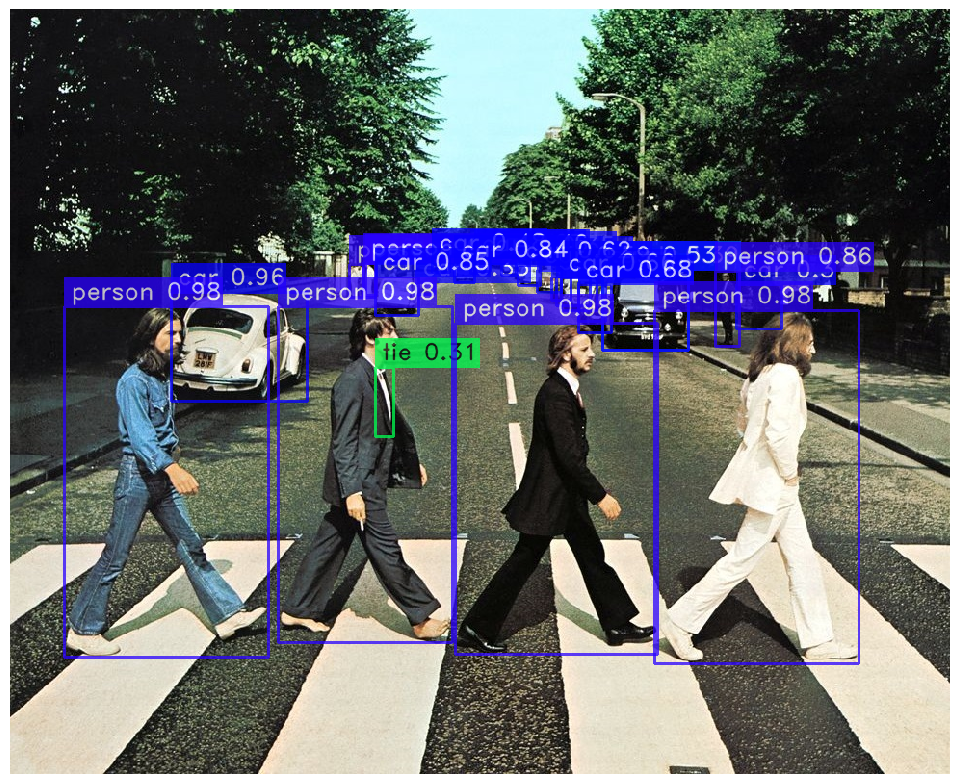

In [ ]:
import super_gradients

yolo_nas = super_gradients.training.models.get("yolo_nas_l", pretrained_weights="coco").cuda()
image_prediction = yolo_nas.predict("https://deci-pretrained-models.s3.amazonaws.com/sample_images/beatles-abbeyroad.jpg")
image_prediction.show()

In [ ]:
# Converting paths into strings
images_path = []
for image in images:
  images_path.append(str(image))

images_path

['/content/drive/MyDrive/Resources/indoor_dataset/iDS/escena1_3.jpg',
 '/content/drive/MyDrive/Resources/indoor_dataset/iDS/escena1_4.jpg',
 '/content/drive/MyDrive/Resources/indoor_dataset/iDS/escena1_2.jpg',
 '/content/drive/MyDrive/Resources/indoor_dataset/iDS/escena1_1.jpg',
 '/content/drive/MyDrive/Resources/indoor_dataset/iDS/escena2_3.jpg',
 '/content/drive/MyDrive/Resources/indoor_dataset/iDS/escena3_2.jpg',
 '/content/drive/MyDrive/Resources/indoor_dataset/iDS/escena3_3.jpg',
 '/content/drive/MyDrive/Resources/indoor_dataset/iDS/escena2_1.jpg',
 '/content/drive/MyDrive/Resources/indoor_dataset/iDS/escena2_4.jpg',
 '/content/drive/MyDrive/Resources/indoor_dataset/iDS/escena3_1.jpg',
 '/content/drive/MyDrive/Resources/indoor_dataset/iDS/escena2_2.jpg',
 '/content/drive/MyDrive/Resources/indoor_dataset/PerfectChoice/escena1_1.jpg',
 '/content/drive/MyDrive/Resources/indoor_dataset/PerfectChoice/escena1_4.jpg',
 '/content/drive/MyDrive/Resources/indoor_dataset/PerfectChoice/escena

In [ ]:
images_predictions = yolo_nas.predict(images_path)
index = 0

for image_prediction in images_predictions:
  # iterate through the dataset image paths and prepares every path for posterior write
  RESULTS_FOLDER = DRIVE / "Resources" / MODEL_NAME / images[index].parts[-2]
  RESULT_IMAGE = RESULTS_FOLDER / images[index].parts[-1]
  RESULT_NAME = str(images[index].parts[-1].split('.')[0]) + ".txt"
  RESULT_PREDICTION = RESULTS_FOLDER / RESULT_NAME
  index += 1
  text = []

  # Saves the prediction and obtains data from it
  image_prediction.save(str(RESULT_IMAGE))
  class_names = image_prediction.class_names
  labels = image_prediction.prediction.labels
  confidence = image_prediction.prediction.confidence
  bboxes = image_prediction.prediction.bboxes_xyxy

  for i, (label, conf, bbox) in enumerate(zip(labels, confidence, bboxes)):
    print("prediction: ", i)
    print("label_id: ", label)
    print("label_name: ", class_names[int(label)])
    print("confidence: ", conf)
    print("bbox: ", bbox[0])
    print("--" * 10)

    line = f'{class_names[int(label)]},{conf},{int(bbox[0])},{int(bbox[1])},{int(bbox[2])},{int(bbox[3])}\n'
    text.append(line)
  with RESULT_PREDICTION.open(mode = "w") as file:
    file.writelines(text)

Predicting Images: 100%|██████████| 33/33 [00:01<00:00, 24.15it/s]


prediction:  0
label_id:  63.0
label_name:  laptop
confidence:  0.9868164
bbox:  333.0818
--------------------
prediction:  1
label_id:  56.0
label_name:  chair
confidence:  0.9746094
bbox:  175.34592
--------------------
prediction:  2
label_id:  66.0
label_name:  keyboard
confidence:  0.97216797
bbox:  259.87424
--------------------
prediction:  3
label_id:  65.0
label_name:  remote
confidence:  0.9663086
bbox:  959.46545
--------------------
prediction:  4
label_id:  64.0
label_name:  mouse
confidence:  0.9477539
bbox:  875.3774
--------------------
prediction:  5
label_id:  73.0
label_name:  book
confidence:  0.94189453
bbox:  1035.2831
--------------------
prediction:  6
label_id:  62.0
label_name:  tv
confidence:  0.8911133
bbox:  688.30194
--------------------
prediction:  7
label_id:  24.0
label_name:  backpack
confidence:  0.81103516
bbox:  26.792454
--------------------
prediction:  8
label_id:  67.0
label_name:  cell phone
confidence:  0.67578125
bbox:  725.09436
-----------

In [ ]:
drive.flush_and_unmount()

prediction:  0
label_id:  43.0
label_name:  knife
confidence:  0.94189453
bbox:  456.70834
--------------------
prediction:  1
label_id:  60.0
label_name:  dining table
confidence:  0.9379883
bbox:  75.0
--------------------
prediction:  2
label_id:  72.0
label_name:  refrigerator
confidence:  0.9355469
bbox:  269.75
--------------------
prediction:  3
label_id:  56.0
label_name:  chair
confidence:  0.92529297
bbox:  210.5
--------------------
prediction:  4
label_id:  44.0
label_name:  spoon
confidence:  0.9169922
bbox:  415.1875
--------------------
prediction:  5
label_id:  56.0
label_name:  chair
confidence:  0.8623047
bbox:  396.125
--------------------
prediction:  6
label_id:  39.0
label_name:  bottle
confidence:  0.7885742
bbox:  541.0834
--------------------
prediction:  7
label_id:  42.0
label_name:  fork
confidence:  0.6333008
bbox:  125.5
--------------------
prediction:  8
label_id:  43.0
label_name:  knife
confidence:  0.45385742
bbox:  125.51042
--------------------
pred